In [829]:
#Libraries

import math
import cmath
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display
import time


# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Cristiano Tolentino Santos
## Matrícula: 211028050

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [830]:
#Usefull signals

def δ(n):
    if n == 0:
        return 1
    else:
        return 0

def u(n):
    if n >= 0:
        return 1
    else:
        return 0

def convolucao(h, x):
    y = []
    for i in range(len(h) + len(x)):
        elemento = 0
        for j in range(len(h) + len(x)):
            if i - j >= 0:
                if (j > (len(h)-1)) and ((i - j) > (len(x)-1)):
                    elemento += 0 * 0
                elif j > (len(h)-1):
                    elemento += 0 * x[i - j]
                elif (i - j) > (len(x)-1):
                    elemento += h[j] * 0
                else:
                    elemento += h[j] * x[i - j]
        y.append(elemento) 
    return y

def funcao_de_transferencia1(z, a):
    k = 1
    b = (z**2) - (z*2*math.cos((6*math.pi)/25)) + 1
    c = (z**2) - (z*a*2*math.cos((6*math.pi)/25)) + (a**2)
    return k*(b/c)

def resposta_magnitude1(omegaG, a):
    omegaR = math.radians(omegaG)
    y1 = math.cos(omegaR) + 1j*math.sin(omegaR)
    y2 = math.cos(omegaR) - 1j*math.sin(omegaR)
    return np.sqrt(funcao_de_transferencia1(y1, a)*funcao_de_transferencia1(y2, a))
 
def resposta_fase1(omegaG, a):
    omegaR = math.radians(omegaG)
    z = math.cos(omegaR) + 1j*math.sin(omegaR)
    Creal = np.real((z**2)-z*a*math.cos((6*math.pi)/25)*(a**2))
    Cimaginario = 0
    ang = np.real(Cimaginario/Creal)
    return math.atan(int(ang))

def filtro1(x):
    k = 1
    a = 0.9
    cos = 2*math.cos((6*math.pi)/25)
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if i == 0:
            y[i] = (k*x[i])
        elif i == 1:
            y[i] = - (k*cos*x[i-1]) + (k*x[i]) + (a*cos*y[i-1])
        else:
            y[i] = (k*x[i-2]) - (k*cos*x[i-1]) + (k*x[i]) - ((a**2)*y[i-2]) + (a*cos*y[i-1])
    return y

def funcao_de_transferencia2(z, a):
    k = 1
    b = (z**2) + (z*2) + 1
    c = (z**2) - (z*a*2*math.cos((7*math.pi)/50)) + (a**2)
    return k*(b/c)

def resposta_magnitude2(omegaG, a):
    omegaR = math.radians(omegaG)
    y1 = math.cos(omegaR) + 1j*math.sin(omegaR)
    y2 = math.cos(omegaR) - 1j*math.sin(omegaR)
    return np.sqrt(funcao_de_transferencia2(y1, a)*funcao_de_transferencia2(y2, a))
 
def resposta_fase2(omegaG, a):
    omegaR = math.radians(omegaG)
    z = math.cos(omegaR) + 1j*math.sin(omegaR)
    Creal = np.real((z**2)-z*a*math.cos((6*math.pi)/25)*(a**2))
    Cimaginario = 0
    ang = np.real(Cimaginario/Creal)
    return math.atan(int(ang))

def filtro2(x):
    k = 1
    a = 0.9
    cos = 2*math.cos((7*math.pi)/50)
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if i == 0:
            y[i] = (k*x[i])
        elif i == 1:
            y[i] = - (2*k*x[i-1]) + (k*x[i]) + (a*cos*y[i-1])
        else:
            y[i] = (k*x[i-2]) + (2*k*x[i-1]) + (k*x[i]) - ((a**2)*y[i-2]) + (a*cos*y[i-1])
    return y

def funcao_de_transferencia3(z, tipo):
    if tipo == "Digital":
        Wc = (10**5)
        W = (10**3)
        T = (0.1*math.pi)/(Wc)
        b = (Wc*T)
        c = (1) - (math.exp(-Wc*T)/z)
        return (b/c)
    elif tipo == "Analogico":
        W = (10**3)
        c = (z + W)
        return (W/c)
    else:
        print("erro na função: funcao_de_transferencia3()")
        return 0

def resposta_magnitude3(j, tipo):
    if tipo == "Digital":
        Wc = (10000)
        W = (10**3)
        T = (0.1*math.pi)/(Wc)
        b = (Wc*T)
        c = np.sqrt((1+(math.exp(-Wc*T)**2)) - (2*math.exp(-Wc*T))*np.cos(j*T))
        return (b/c)
    elif tipo == "Analogico":
        W = (10000)
        c = np.sqrt(j**2 + W**2)
        return W/c
 
def resposta_magnitude4(j, tipo):
    if tipo == "Digital":
        Wc = (10000)
        W = (10**3)
        T = (0.01*math.pi)/(Wc)
        b = (Wc*T)
        c = np.sqrt((1+(math.exp(-Wc*T)**2)) - (2*math.exp(-Wc*T))*np.cos(j*T))
        return (b/c)
    elif tipo == "Analogico":
        W = (10000)
        c = np.sqrt(j**2 + W**2)
        return W/c

def filtro3(x):
    k = 1
    a = 0.9
    cos = 2*math.cos((7*math.pi)/50)
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if i == 0:
            y[i] = (k*x[i])
        elif i == 1:
            y[i] = - (2*k*x[i-1]) + (k*x[i]) + (a*cos*y[i-1])
        else:
            y[i] = (k*x[i-2]) + (2*k*x[i-1]) + (k*x[i]) - ((a**2)*y[i-2]) + (a*cos*y[i-1])
    return y

# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é: 

$$ f_a = 500~Hz $$ 

Siga as questões abaixo.

## Questão 1a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

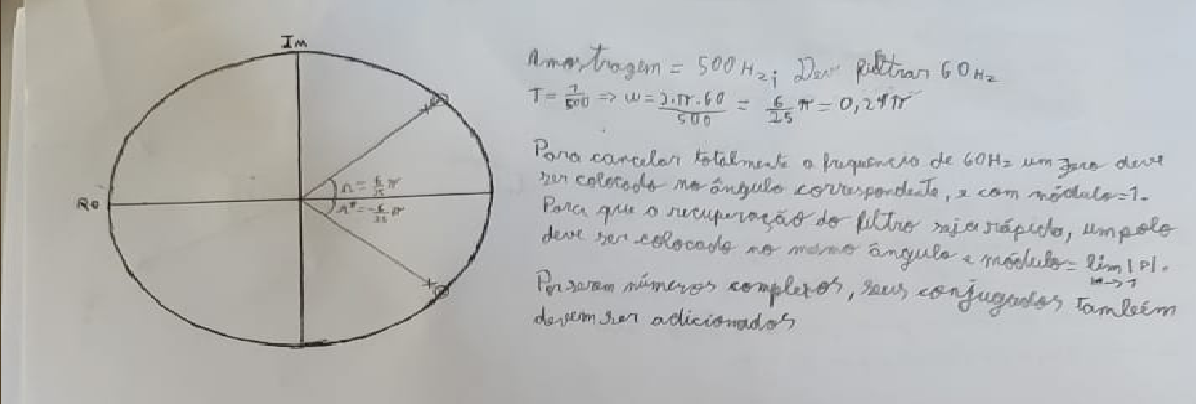

In [831]:
# Não consegui fazer funcionar o gráfico em comentário kk

## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

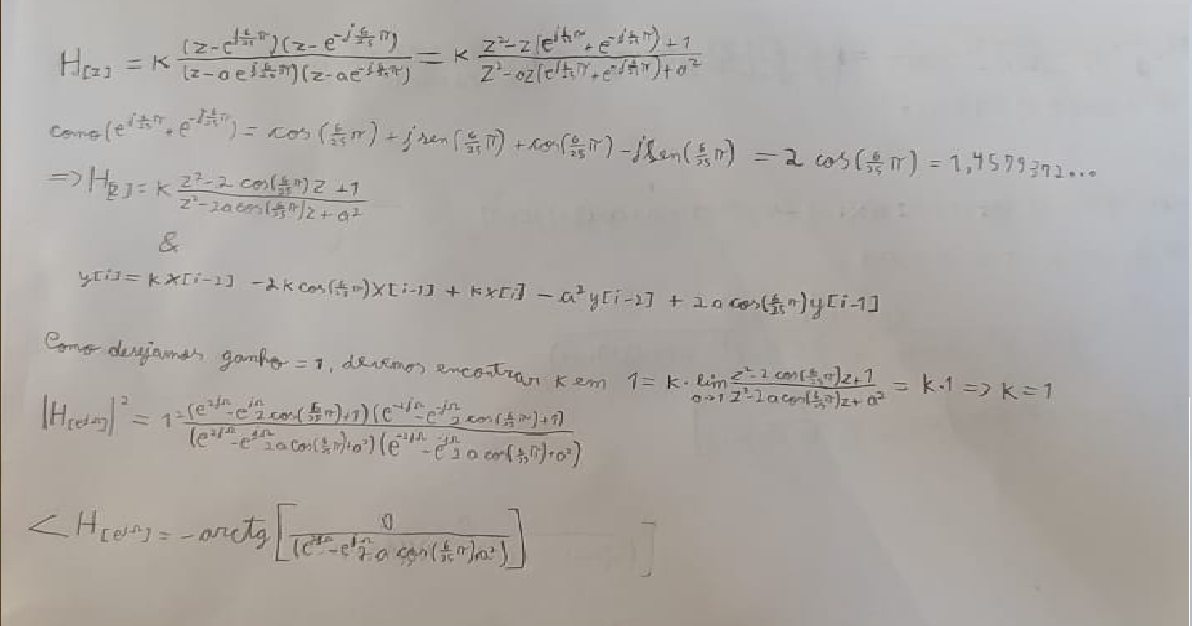

## Questão 1c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

Gráfico da resposta em magnitude


c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


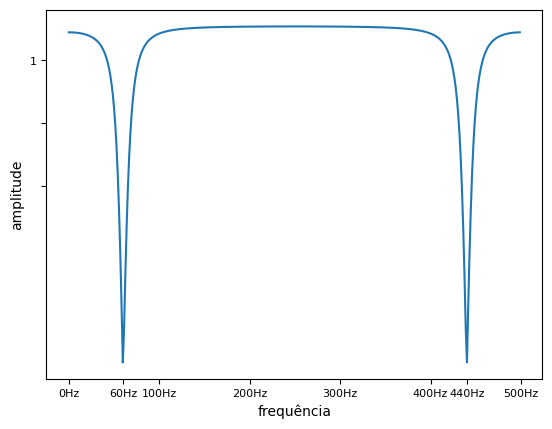

Gráfico da resposta em fase


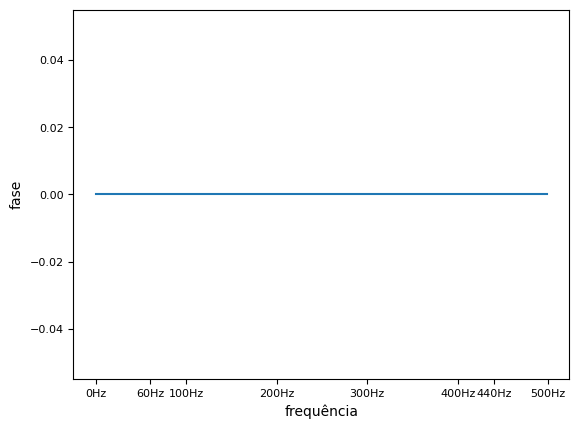

In [832]:
rm = []
rf = []
for j in range(360):
    rm.append(resposta_magnitude1(j, 0.9))
    rf.append(resposta_fase1(j, 0.9))


print("Gráfico da resposta em magnitude")
plt.plot(rm)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.xticks([0, 43.2, 72, 144, 216, 288, 316.8, 360], ["0Hz", "60Hz", "100Hz", "200Hz", "300Hz", "400Hz", "440Hz", "500Hz"])
plt.yticks([0.6, 0.8, 1], [" ", " ", "1"])
plt.xlabel("frequência")
plt.ylabel("amplitude")
plt.show()

print("Gráfico da resposta em fase")
plt.plot(rf)
plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.xticks([0, 43.2, 72, 144, 216, 288, 316.8, 360], ["0Hz", "60Hz", "100Hz", "200Hz", "300Hz", "400Hz", "440Hz", "500Hz"])
plt.xlabel("frequência")
plt.ylabel("fase")
plt.show()



## Questão 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

Gráfico do sinal noisy_ecg_data.mat


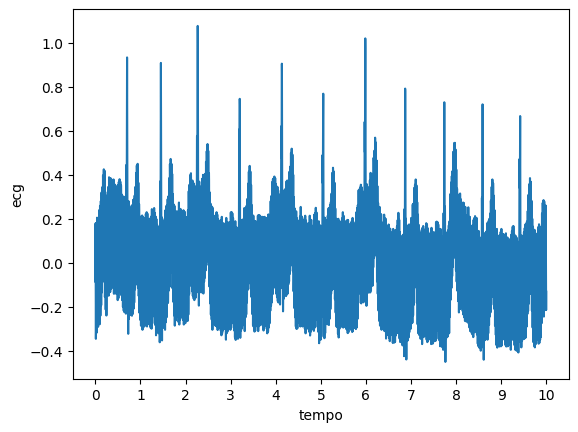

Gráfico do sinal filtrado


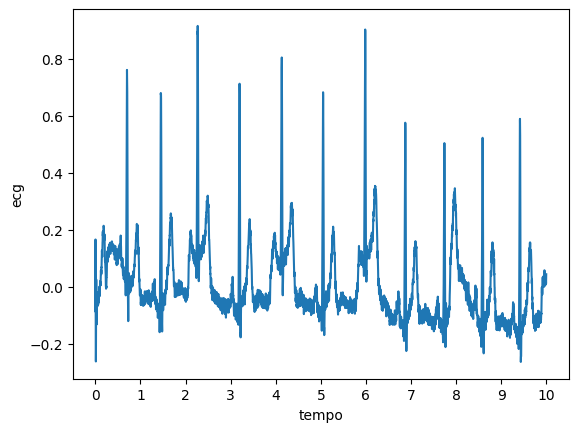

In [833]:
sinal = sp.io.loadmat('noisy_ecg_data.mat')['noisy_ecg'].ravel()
sinal_filtrado = filtro1(sinal)

print("Gráfico do sinal noisy_ecg_data.mat")
plt.plot(sinal)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.xlabel("tempo")
plt.ylabel("ecg")
plt.show()

print("Gráfico do sinal filtrado")
plt.plot(sinal_filtrado)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.xlabel("tempo")
plt.ylabel("ecg")
plt.show()

# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.

## Questão 2a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

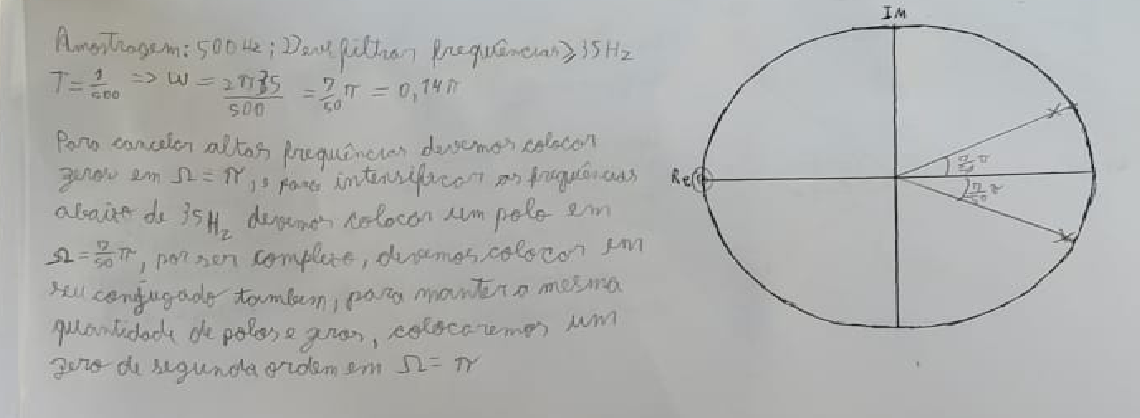

In [834]:
#Resposta da questão 2a

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

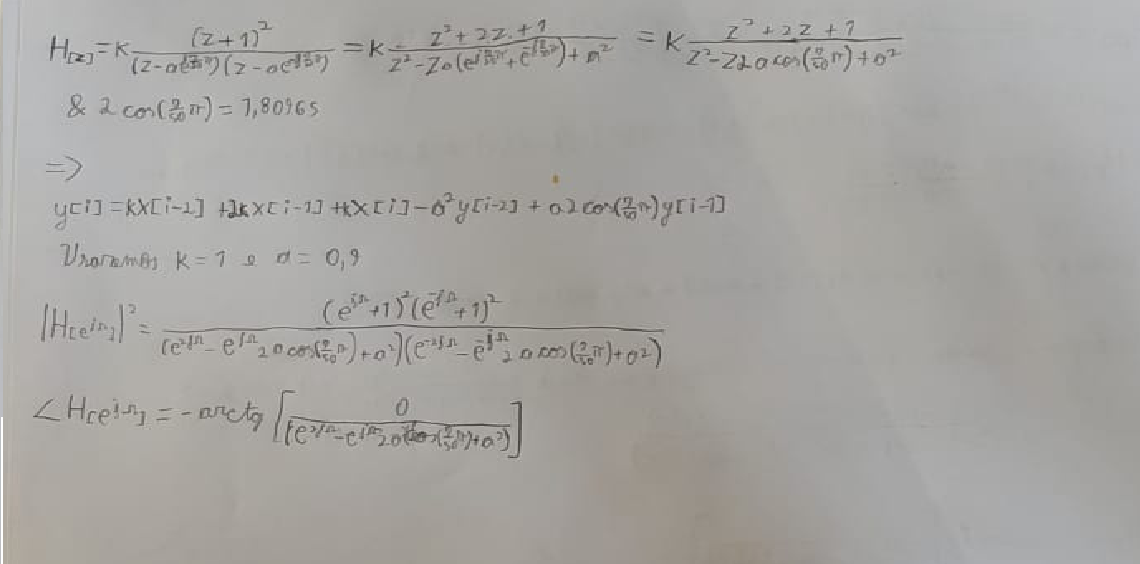

In [835]:
#Resposta da questão 2b

## Questão 2c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

Gráfico da resposta em magnitude


c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Usuário\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


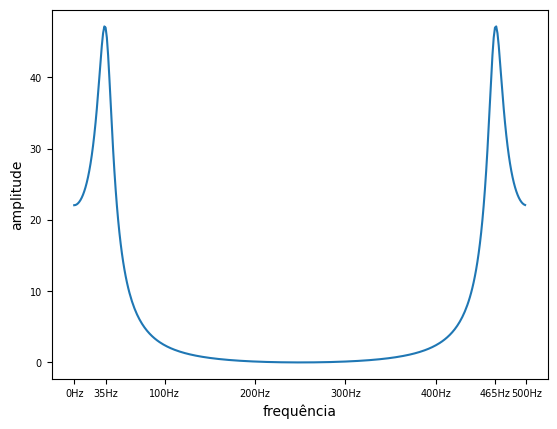

Gráfico da resposta em fase


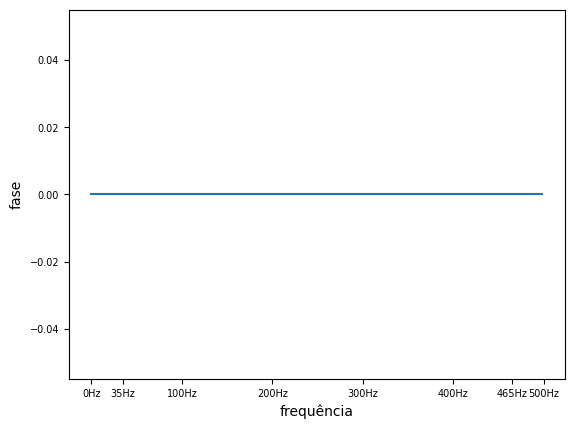

In [836]:
rm = []
rf = []
for j in range(360):
    rm.append(resposta_magnitude2(j, 0.9))
    rf.append(resposta_fase2(j, 0.9))


print("Gráfico da resposta em magnitude")
plt.plot(rm)
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.xticks([0, 25.2, 72, 144, 216, 288, 334.8, 360], ["0Hz", "35Hz", "100Hz", "200Hz", "300Hz", "400Hz", "465Hz", "500Hz"])
plt.xlabel("frequência")
plt.ylabel("amplitude")
plt.show()

print("Gráfico da resposta em fase")
plt.plot(rf)
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.xticks([0, 25.2, 72, 144, 216, 288, 334.8, 360], ["0Hz", "35Hz", "100Hz", "200Hz", "300Hz", "400Hz", "465Hz", "500Hz"])
plt.xlabel("frequência")
plt.ylabel("fase")
plt.show()


## Questão 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

Gráfico do sinal noisy_ecg_data_2.mat


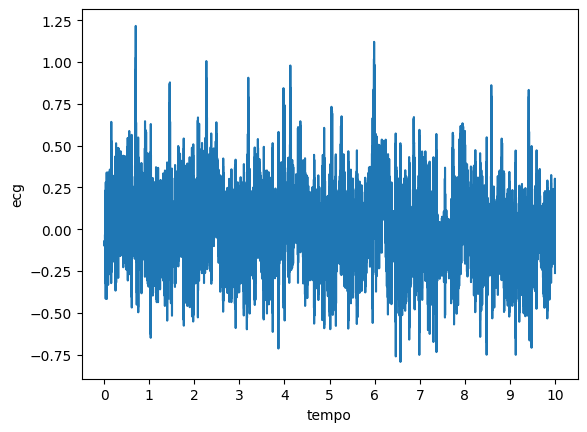

Gráfico do sinal filtrado


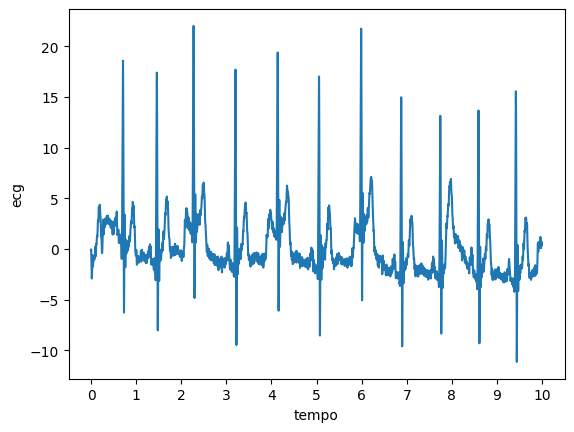

In [837]:
sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()
sinal_filtrado = filtro2(sinal)

print("Gráfico do sinal noisy_ecg_data_2.mat")
plt.plot(sinal)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.xlabel("tempo")
plt.ylabel("ecg")
plt.show()

print("Gráfico do sinal filtrado")
plt.plot(sinal_filtrado)
plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000], ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10"])
plt.xlabel("tempo")
plt.ylabel("ecg")
plt.show()

# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Questão 3a (1  ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

Gráfico da resposta em magnitude


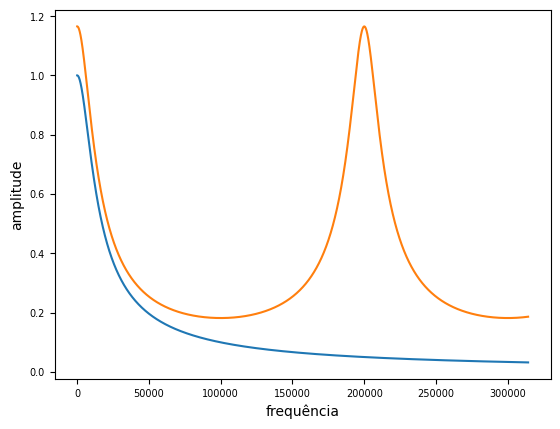

Analogico: Azul
Digital: Laranja


In [838]:
# Como Ha(s) = Wc / (Wc +s), a conversão para digital pode ser feita pela linha 5 da tabela 5.3 do livro Sinais e Sistema 2a edição B.P. Lathi
# Então H[z] = (Wc*T) / (1 - math.exp(-Wc*T)/z)
# Para encontrar T usamos o cálculo T = (0.1*np.pi)/(Wc) = 3.14159*10^-6

# =>
# funcao_de_transferencia3(z)
Ha = []
H = []
for j in range(0, 314159):
    Ha.append(resposta_magnitude3(j, "Analogico"))
    H.append(resposta_magnitude3(j, "Digital"))

print("Gráfico da resposta em magnitude")
plt.plot(Ha)
plt.plot(H)
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.xlabel("frequência")
plt.ylabel("amplitude")
plt.show()
print("Analogico: Azul")
print("Digital: Laranja")


## Questão 3b (1  ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

Gráfico da resposta em magnitude


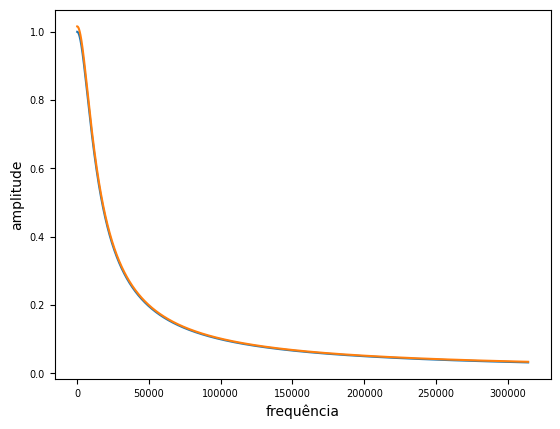

Analogico: Azul
Digital: Laranja


In [839]:
# Como Ha(s) = Wc / (Wc +s), a conversão para digital pode ser feita pela linha 5 da tabela 5.3 do livro Sinais e Sistema 2a edição B.P. Lathi
# Então H[z] = (Wc*T) / (1 - math.exp(-Wc*T)/z)
# Para encontrar T usamos o cálculo T = (0.01*np.pi)/(Wc) = 3.14159*10^-7

# =>
# funcao_de_transferencia4(z)
Ha = []
H = []
for j in range(0, 314159):
    Ha.append(resposta_magnitude4(j, "Analogico"))
    H.append(resposta_magnitude4(j, "Digital"))

print("Gráfico da resposta em magnitude")
plt.plot(Ha)
plt.plot(H)
plt.tick_params(axis='x', labelsize=7)
plt.tick_params(axis='y', labelsize=7)
plt.xlabel("frequência")
plt.ylabel("amplitude")
plt.show()
print("Analogico: Azul")
print("Digital: Laranja")


## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

Gráfico de ha[t]


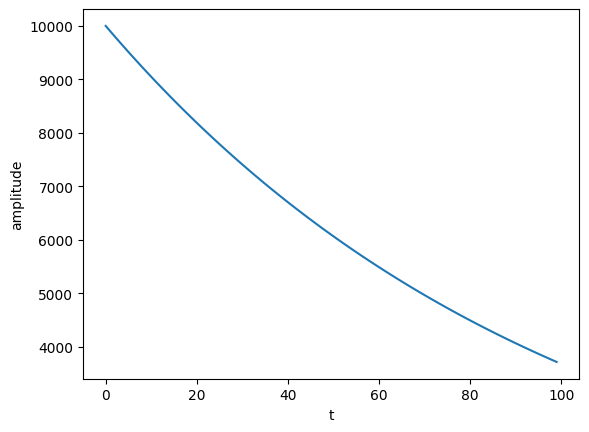

Gráfico de h1[n]


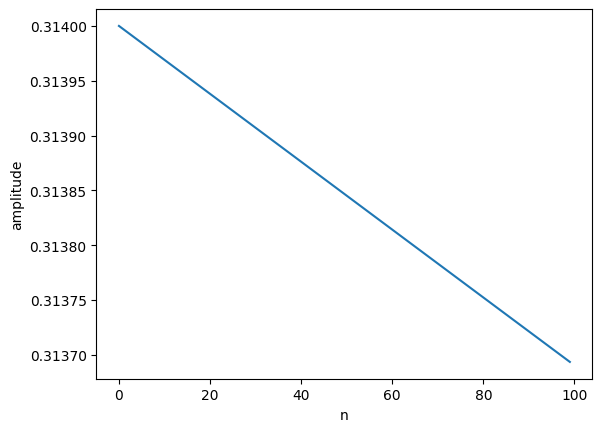

Gráfico de h2[n]


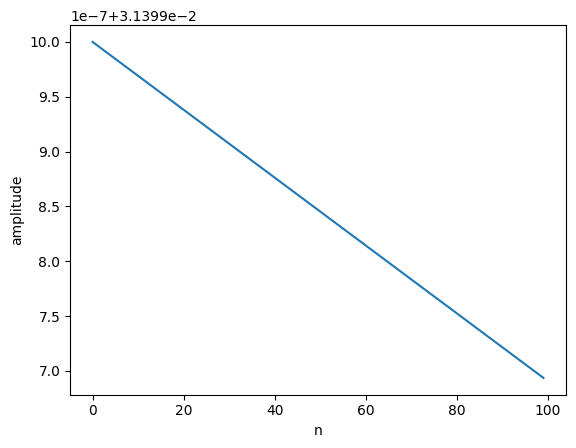

In [840]:
# Pela linha 5 da tabela 4.1 do livro Sinais e Sistema 2a edição B.P. Lathi ha(t) = W*np.exp(-W*t)*u(t)
# Pela linha 6 da tabela 5.2 do livro Sinais e Sistema 2a edição B.P. Lathi h1(n) = W*T*np.exp(-W*T*n)*u(n)
# Pela linha 6 da tabela 5.2 do livro Sinais e Sistema 2a edição B.P. Lathi h2(n) = W*T*np.exp(-W*T*n)*u(n)

def ha(t):
    W = 10000
    return (W*np.exp(-W*t))

def h1(n):
    W = 10000
    T = 0.0000314
    return (W*T*np.exp(-W*T*n))

def h2(n):
    W = 10000
    T = 0.00000314
    return (W*T*np.exp(-W*T*n))

Lista_ha = []
Lista_h1 = []
Lista_h2 = []

#Modifiquei os ranges para igualar as escalas devido as diferentes taxas de amostragem
for i in range(100):
    Lista_ha.append(ha(i*0.000001))
    Lista_h1.append(h1(i*0.0000314))
    Lista_h2.append(h2(i*0.00000314))

print("Gráfico de ha[t]")
plt.plot(Lista_ha)
plt.xlabel("t")
plt.ylabel("amplitude")
plt.show()

print("Gráfico de h1[n]")
plt.plot(Lista_h1)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.show()

print("Gráfico de h2[n]")
plt.plot(Lista_h2)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.show()

## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n]. 

Resposta de ha[t]


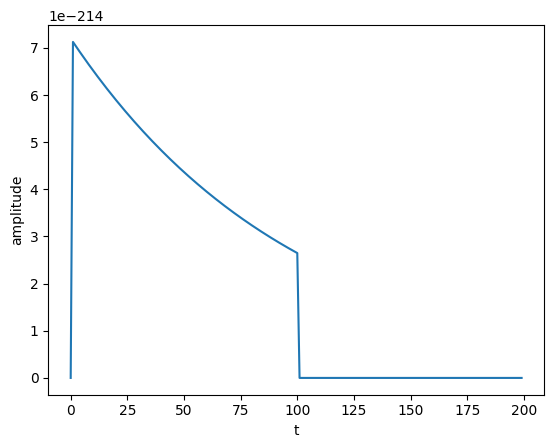

Resposta de h1[n]


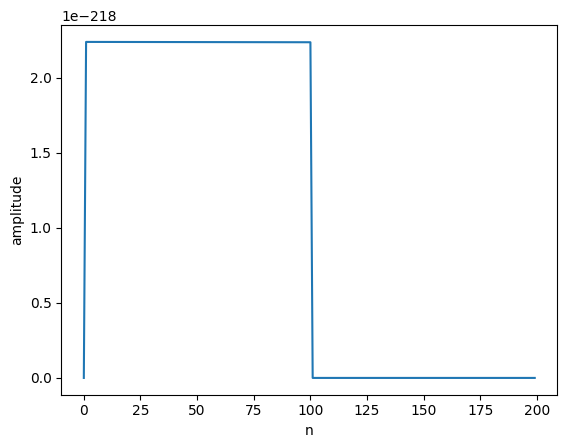

Resposta de h2[n]


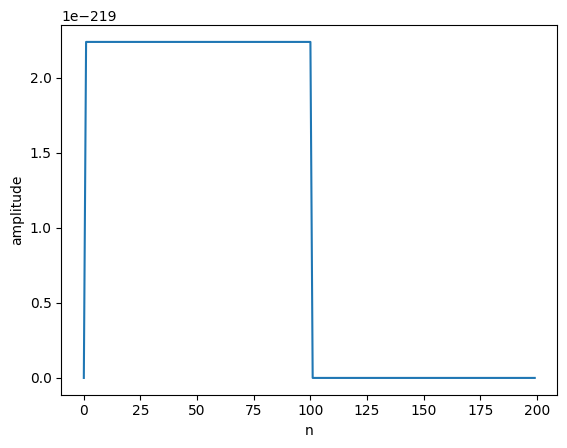

In [843]:
def sinal3d(t):
    if t <= 0:
        return 0
    else:
        return np.exp(-500*t)

s3d = []

for i in range(100):
    s3d.append(sinal3d(i))

ha_sinal = convolucao(Lista_ha, s3d)
h1_sinal = convolucao(Lista_h1, s3d)
h2_sinal = convolucao(Lista_h2, s3d)

print("Resposta de ha[t]")
plt.plot(ha_sinal)
plt.xlabel("t")
plt.ylabel("amplitude")
plt.show()

print("Resposta de h1[n]")
plt.plot(h1_sinal)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.show()

print("Resposta de h2[n]")
plt.plot(h2_sinal)
plt.xlabel("n")
plt.ylabel("amplitude")
plt.show()